jupyter nbconvert explanatory.ipynb --to slides --post serve --template output_toggle.tpl


# Exploration of Ford GoBike Dataset 
## by Bashayer Yousef

## Preliminary Wrangling

> This document explores a dataset containing bike trip for 2017 and 2018 attributes for 2480701 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
datasets = ['\dataset\2017-fordgobike-tripdata.csv',
            '\dataset\201801-fordgobike-tripdata.csv',
              '\dataset\201802-fordgobike-tripdata.csv',
              '\dataset\201803-fordgobike-tripdata.csv',
              '\dataset\201804-fordgobike-tripdata.csv',
              '\dataset\201805-fordgobike-tripdata.csv',
              '\dataset\201806-fordgobike-tripdata.csv',
              '\dataset\201807-fordgobike-tripdata.csv',
              '\dataset\201808-fordgobike-tripdata.csv',
              '\dataset\201809-fordgobike-tripdata.csv',
              '\dataset\201810-fordgobike-tripdata.csv',
              '\dataset\201811-fordgobike-tripdata.csv',
               '\dataset\201812-fordgobike-tripdata.csv']
# joining all the data files into a single dataframe
df = pd.concat([pd.read_csv(f,sep=';') for f in glob.glob("dataset" + "/*.csv")],ignore_index=True, sort=False)


In [3]:
df.shape

(2480701, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480701 entries, 0 to 2480700
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 265.0+ MB


## Cleaning

In [5]:
#drop unwanted attributes
df.drop(['bike_share_for_all_trip'], axis=1, inplace=True)

**Changing the data types**

In [6]:
df['end_station_id'] = df['end_station_id'].astype('object')
df.end_station_id.replace('nan',np.nan)
df['start_station_id'] = df['start_station_id'].astype('object') 
df.start_station_id.replace('nan',np.nan)
df['bike_id'] = df['bike_id'].astype('object') 
df['start_time'] = pd.to_datetime(df['start_time'])  
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                           object
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
dtype: object

In [7]:
#find the number of bikes that involved to the dataset
df.bike_id.nunique()

5459

In [8]:
#checking for duplicates in the dataset
sum(df.duplicated())

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

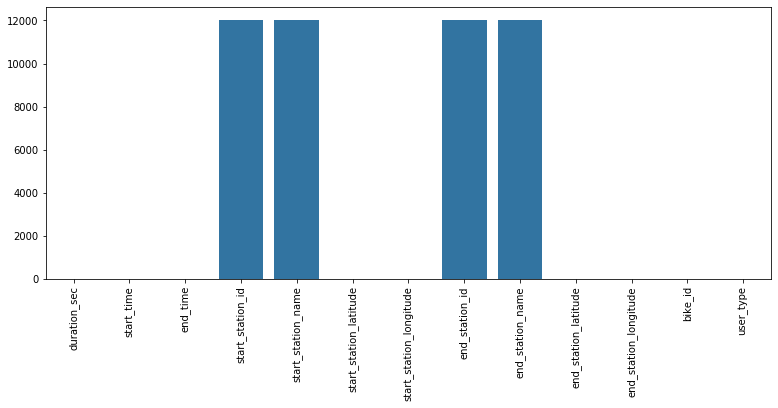

In [9]:
# counting missing value
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
plt.subplots(1, sharex=True,figsize=(13,5))
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation=90)

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [11]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,2.480701e+06,2.480701e+06,2.480701e+06,2.480701e+06,2.480701e+06
mean,8.991838e+02,3.776807e+01,-1.223525e+02,3.776820e+01,-1.223519e+02
std,2.585664e+03,1.016692e-01,1.531112e-01,1.015601e-01,1.527115e-01
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02
25%,3.550000e+02,3.777106e+01,-1.224116e+02,3.777143e+01,-1.224099e+02
50%,5.620000e+02,3.778127e+01,-1.223974e+02,3.778165e+01,-1.223974e+02
75%,8.810000e+02,3.779539e+01,-1.222935e+02,3.779539e+01,-1.222948e+02
max,8.636900e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01


### What is the structure of your dataset?

> There are 2480701 trips in this dataset with 13 features or attribute. Each trip contains information of (duration_sec, start_time, end_time, start_station_id, start_station_name,start_station_latitude, start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id, user_type). Most of the variables are numeric in nature, but the variables user_type, start_station_name, end_station_name, and bike_id are string. 

### What is/are the main feature(s) of interest in your dataset?

> The main feaures of this dataset are finding the average of trip times, finding the monthly bike ride trend by average trip times and find the stations that have more interest to start the trips at them. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features duration_sec, start_time and end_time will help to find the interst of the dataset. Whereas the start_station_id feature will be useful for finding the common stations for the bike riders usually start at them.%




## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration_sec.

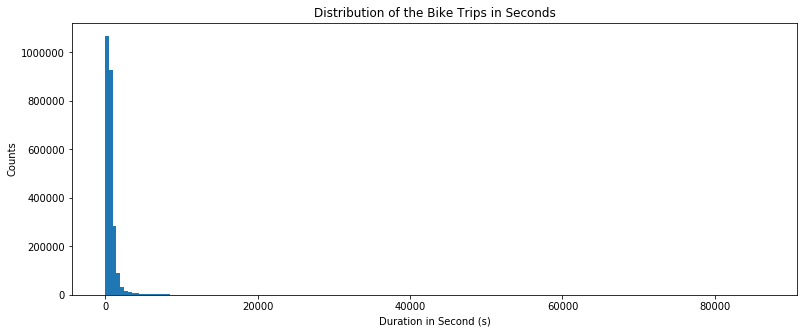

In [12]:
# start with a standard-scaled plot

bins = np.arange(0, df.duration_sec.max()+500, 500)

plt.figure(figsize=[13, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in Second (s)')
plt.title('Distribution of the Bike Trips in Seconds')
plt.ylabel('Counts')
plt.show()

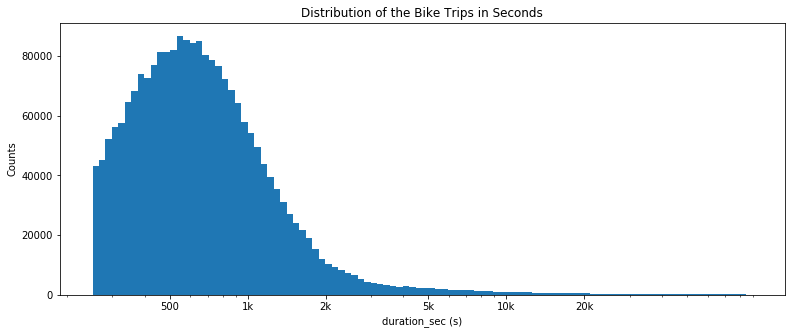

In [13]:
# there's a long tail in the distribution, so let's put it on a log (log10) scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[13, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('Distribution of the Bike Trips in Seconds')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration_sec (s)')
plt.ylabel('Counts')
plt.title('Distribution of the Bike Trips in Seconds')
plt.show()

>**The duration of trips has a long-tailed distribution, with a lot of trips that were short trips and a few were long trips. On the plotted on a log-scale, the duration looks skewed to the left with approximately peak between 350 and 1250 seconds (5-20 minuts). More than 100,000 trips were held in that time. Which means the most common trips were short trips.**


> **Next is to analyze start_time** in this step I am going to find the common month for biking the riders usually ride bikes at it 

In [14]:
df['month'] = pd.DatetimeIndex(df['start_time']).month
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,12


Text(0, 0.5, 'Number of trips')

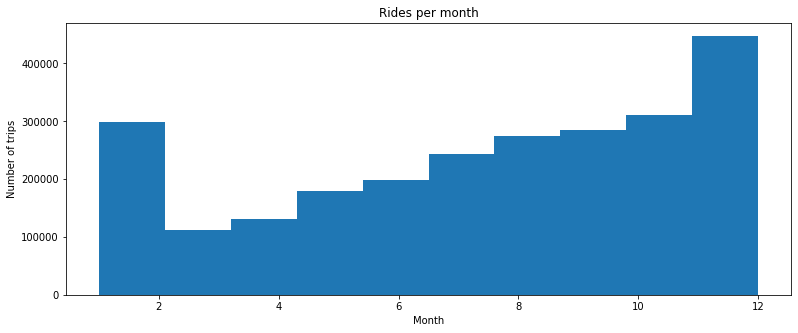

In [15]:
plt.figure(figsize = (13,5))
plt.hist(data=df,  x = 'month')
plt.xlabel('Month')
plt.title('Rides per month')
plt.ylabel('Number of trips')

> From the above plot, I can notice that the trips are at the beginning of the months of the year, they are few and start increasing every month to reach to the maximum number of trips that are in December. These trips begin to decrease in January, which the number of trips on that month is close to those trips in November. Trips decrease dramatically to the minimum number of trips in February and begin to gradually increase thereafter.
Hence, we assume that most bikes' riders may be affected by the weather in these areas, so they do not prefer trips at certain times of the year.

> ### Finding the Common Stations 

> In the part I will find the common stations that bikes' riders usually start at them.

> First finding the value counts of the start_station_name feature

In [16]:
df.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 54596
San Francisco Caltrain Station 2  (Townsend St at 4th St)          51557
Market St at 10th St                                               48756
San Francisco Caltrain (Townsend St at 4th St)                     48499
The Embarcadero at Sansome St                                      47514
Berry St at 4th St                                                 45692
Montgomery St BART Station (Market St at 2nd St)                   44931
Powell St BART Station (Market St at 4th St)                       43290
Steuart St at Market St                                            38690
Howard St at Beale St                                              37507
Powell St BART Station (Market St at 5th St)                       34251
Embarcadero BART Station (Beale St at Market St)                   30371
3rd St at Townsend St                                              28741
Townsend St at 7th St                              

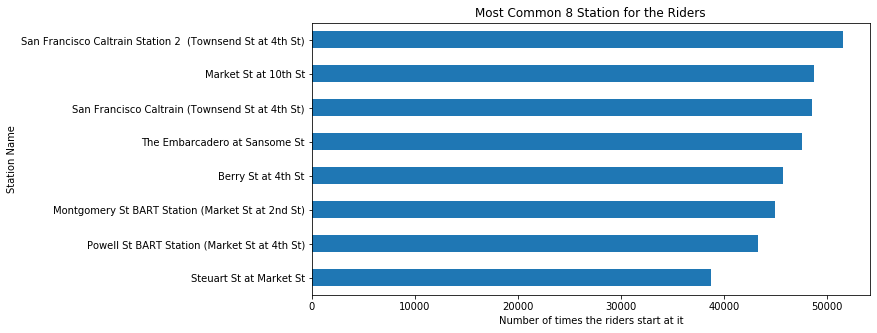

In [17]:
common_name = df.start_station_name.value_counts()[1:9].sort_values()
plt.figure(figsize = (10,5))
plt.title('Most Common 8 Station for the Riders')
plt.xlabel('Number of times the riders start at it')
plt.ylabel('Station Name');
common_name.plot(kind = 'barh')
#plt.xticks(rotation=90)

> Most of trips in 2017-2018 the riders usually start at it these 8 station. San Francisco Ferry Building (Harry Bridges Plaza) take the top one with more than 50,000 trips was start at 

> **Finding the type of the bike's riders**

> First, I am going to find the value counts of the user_ type feature to find which plot is suitable for that. 


In [18]:
df.user_type.value_counts()

Subscriber    2079058
Customer       401643
Name: user_type, dtype: int64

> From the above result we can notice that there is only two types of users which are the Subscriber and the Customer one. Therefor I can use the pie chart for visualization of this attribute (uni-variate visualization)

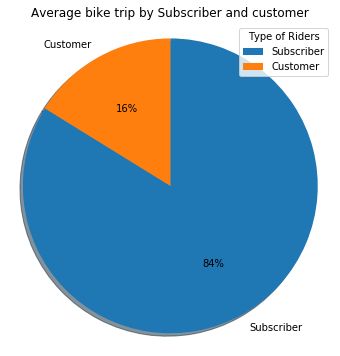

In [19]:
# pie chart 
sorted_counts = df['user_type'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, shadow=True,
        counterclock = False, autopct='%1.0f%%');
plt.axis('square')
plt.title('Average bike trip by Subscriber and customer')
plt.legend(title="Type of Riders",
          loc="upper right")

>From the above figure I can notice most of the users were subscribed with the rate of 84%. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked skewed to the left.


## Bivariate Exploration


> **Next step is finding the relationship between the duration of trips with the month**


> First, I am going to convert sec to minuts. 

In [20]:
df['min'] = df.duration_sec/ 60

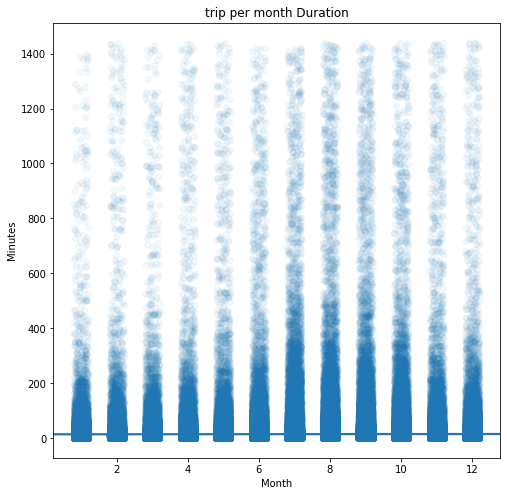

In [21]:
plt.figure(figsize = [8,8])
sb.regplot(data = df, x = 'month', y = 'min', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/20})
plt.title('trip per month Duration')
plt.xlabel('Month')
plt.ylabel('Minutes');

> The plot shows that the trips over two years never be under 20 minuts. January and February had fewer trips that lasted as long. wheras the longest trips during were in August, July, June and September.

### Finding the Average trip duration in minuts per type of the user

Text(0.5, 0, 'minutes')

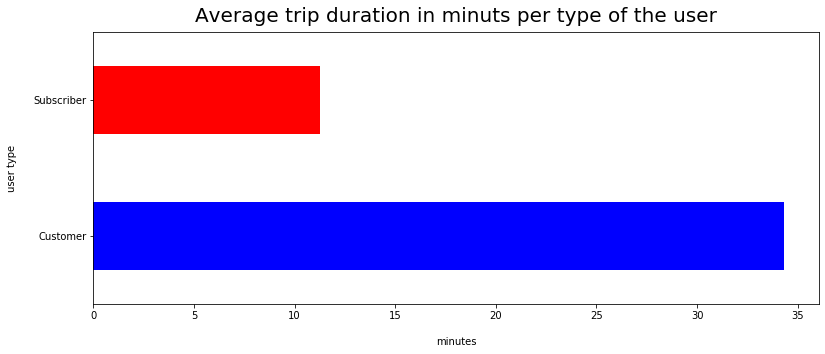

In [22]:
new_color=['blue', 'red']
ax = df.groupby('user_type')['min'].mean().plot(kind='barh', color=new_color, figsize=(13,5))
ax.set_title('Average trip duration in minuts per type of the user', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes', labelpad=16)

> the average number of customer trips is approximately 12 minutes, which is approximately one-third of the customer trips, which are an average of 34 minutes. 

> The customer users have longer trip times

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration



### Finding How the Average Trip Time is Affected by User Type and Month.

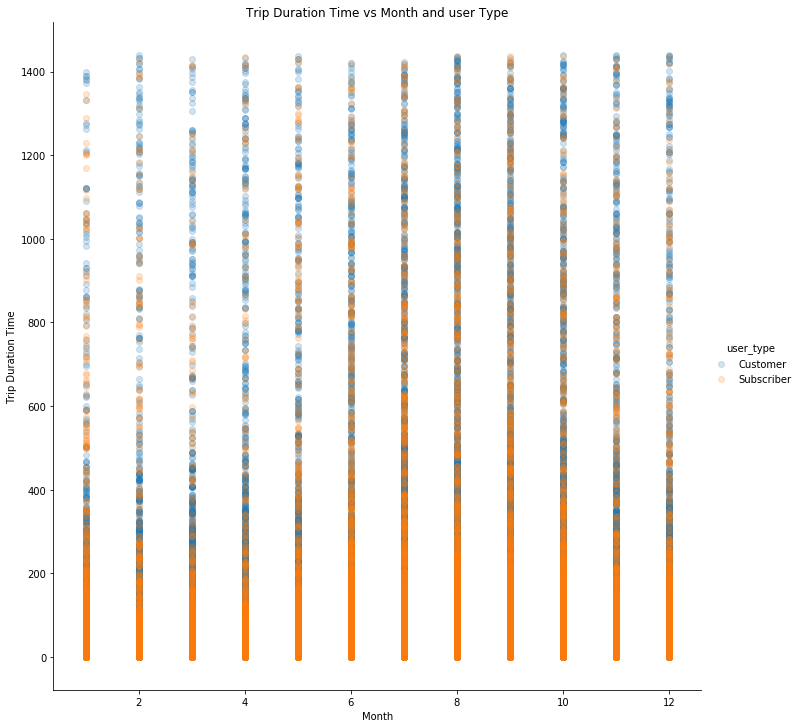

In [23]:
# Finding out how the average trip time is affected by user type and month.
m = sb.FacetGrid(data =  df, hue = 'user_type', height = 10)
m.map(plt.scatter, 'month','min', alpha = 1/5)
m.add_legend()
plt.title('Trip Duration Time vs Month and user Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration Time');

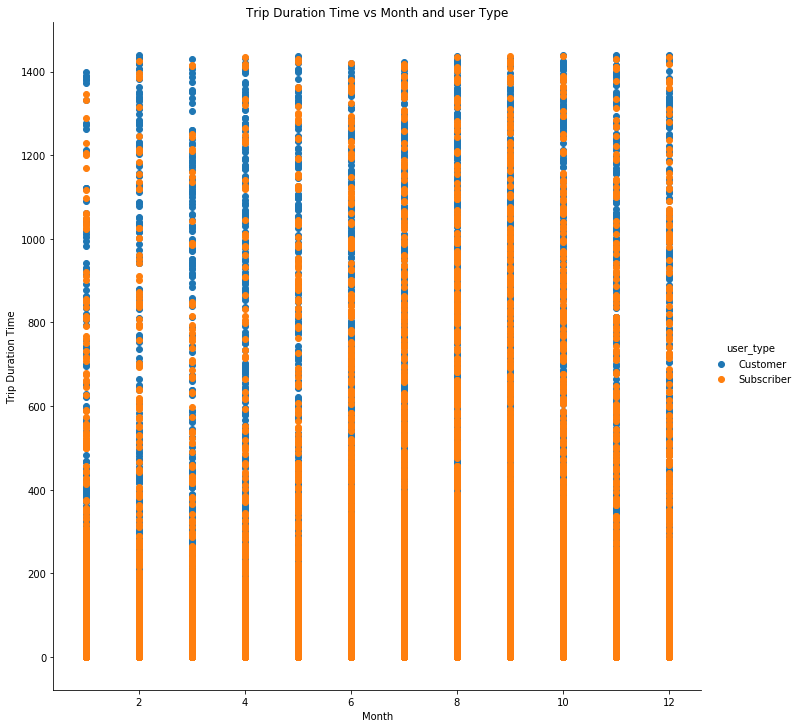

In [24]:
# Finding out how the average trip time is affected by user type and month.
m = sb.FacetGrid(data =  df, hue = 'user_type', height = 10)
m.map(plt.scatter, 'month','min')# without alpha
m.add_legend()
plt.title('Trip Duration Time vs Month and user Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration Time');

> Users who are subscribed have more trips on the whole than cutomer users and the duration time is moe for the subscribed one.
Fourthermore the customer users have longer trip times but the number of trip itself is less. There are more subscribers in the summer months of June, July and August with longer trip times.

### Conclusion
> By analyzing the dataset for two years(2017-2018), I can say that 84% of the subscribers are bike riders and the remaining 16% of the customers. Also, the average number of customer trips is approximately 12 minutes, which is approximately one-third of the customer trips, which are an average of 34 minutes. Also, trips in certain months of the year increase by a very large rate. The use of bikes in the San Francisco area of both stations(1and 2), which represents nearly 100,000 trips. This may be a sign of a lack of public transportation or congestion of cars, so they prefer biking